In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
from direction_field_helper import draw_direction_field

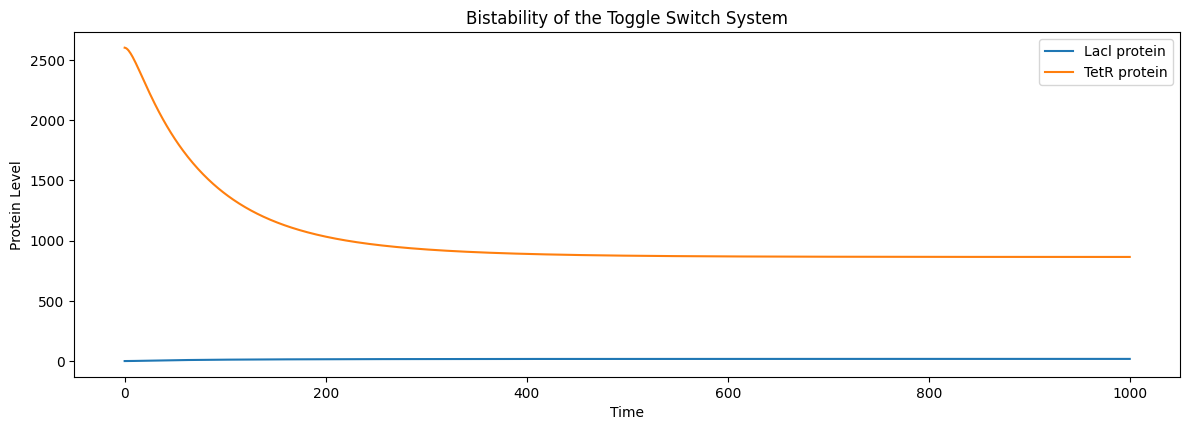

In [3]:
def sdot2(s,t,params):
    ML, PL, MT, PT = s
    km0L, kmL, KL, nL, kdmL, kpL, kdpL, km0T, kmT, KT, nT, kdmT, kpT, kdpT = params

    rate_ML_prod = km0L + kmL*(KT**nT/(PT**nT+KT**nT))
    rate_ML_loss = kdmL*ML

    rate_PL_prod =  kpL*ML
    rate_PL_loss =  kdpL*PL

    rate_MT_prod = km0T + kmT*(KL**nL/(PL**nL+KL**nL))
    rate_MT_loss = kdmT*MT

    rate_PT_prod = kpT*MT
    rate_PT_loss = kdpT*PT
        
    dML = rate_ML_prod - rate_ML_loss
    dPL = rate_PL_prod - rate_PL_loss
    
    dMT = rate_MT_prod - rate_MT_loss
    dPT = rate_PT_prod - rate_PT_loss
    
    ds = [dML, dPL, dMT, dPT]
    return ds

# define parameter values
km0L = 0.032
kmL = 8.3
KL = 31.94
nL = 2
kdmL = 0.1386 
kpL = 0.9726
kdpL = 0.0165

km0T = 0.119
kmT = 2.06
KT = 30
nT = 2
kdmT = 0.1386 
kpT = 1.170
kdpT = 0.0165

params = [km0L, kmL, KL, nL, kdmL, kpL, kdpL,
          km0T, kmT, KT, nT, kdmT, kpT, kdpT]

# define initial conditions
ML0 = 0
PL0 = 0
MT0 = 36
PT0 = 2600

s0 = [ML0, PL0, MT0, PT0]

# define time observation points
t_start = 0
t_end = 1000

t_obs = np.arange(t_start, t_end+0.1, 1)

# run simulation
s_obs = odeint(sdot2, s0, t_obs, args=(params,))

# extract the observations
ML_obs = s_obs[:,0]
PL_obs0 = s_obs[:,1]
MT_obs = s_obs[:,2]
PT_obs0 = s_obs[:,3]

plt.figure(figsize=(12, 8))

# Plot protein levels
plt.subplot(2, 1, 2)
plt.plot(t_obs, PL_obs0, label = "Lacl protein")
plt.plot(t_obs, PT_obs0, label = "TetR protein")

plt.xlabel('Time')
plt.ylabel('Protein Level')
plt.title('Bistability of the Toggle Switch System')
plt.legend()

plt.tight_layout()
plt.show()

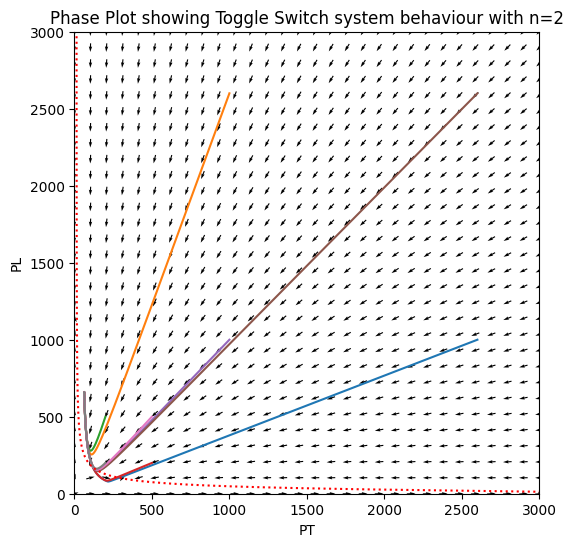

In [10]:
## need to update vals to represent Lugagne et al.


def sdot3(s,t,params):
    PL, PT = s
    vp0L, vpL, vdpL, KL, nL, vp0T, vpT, vdpT, KT, nT = params

    rate_PL_prod =  vp0L + vpL*(KT**nT/(PT**nT+KT**nT))
    rate_PL_loss =  vdpL*PL

    rate_PT_prod = vp0T + vpT*(KL**nL/(PL**nL+KL**nL))
    rate_PT_loss = vdpT*PT
        
    dPL = rate_PL_prod - rate_PL_loss
    dPT = rate_PT_prod - rate_PT_loss
    
    ds = [dPL, dPT]
    return ds

# define parameter values
vp0L = 0.032*0.9726/0.1386
vpL = 8.3*0.9726/0.1386
vdpL = 0.0165
KL = 31.94
nL = 2

vp0T = 0.119*1.170/0.1386 
vpT = 2.06*1.170/0.1386
vdpT = 0.0165
KT = 30
nT = 2

params = [ vp0L, vpL, vdpL, KL, nL, vp0T, vpT, vdpT, KT, nT ]

# s0       PL    PT
s0_1 = [ 1000 , 2600 ]
s0_2 = [ 2600 , 1000]
s0_3 = [ 500 , 200]
s0_4 = [ 200 , 500] 
s0_5 = [ 1000 , 1000 ]
s0_6 = [ 2600 , 2600]
s0_7 = [ 500 , 500]
s0_8 = [ 200 , 200] 

s0_vals =  [ s0_1, s0_2, s0_3, s0_4 ,s0_5, s0_6, s0_7, s0_8]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

for s0 in s0_vals:
    # run simulation with init condition
    t_start = 0
    t_end = 10000
    t_obs = np.arange(t_start, t_end + 0.1, 1)
    s_obs = odeint(sdot3, s0, t_obs, args=(params,))

    # extract results
    PL_obs = s_obs[:,0]
    PT_obs = s_obs[:,1]

    # plot on phase plot
    ax.plot(PT_obs, PL_obs)
    
ax.set_ylim(0,3000)
ax.set_xlim(0,3000)

draw_direction_field(ax,sdot3,params,normalise=True )

# add code to calculate and draw nullclines below:
PL_nullcline_PT_vals = np.arange(0,3000,1)
PL_nullcline_PL_vals = []

for PT in PL_nullcline_PT_vals:
    PL =  (vp0L + vpL*(KT**nT/(PT**nT + KT**nT))) / vdpL
    PL_nullcline_PL_vals.append(PL)

ax.plot(PL_nullcline_PL_vals, PL_nullcline_PT_vals, "r:")
ax.set_xlabel("PT")
ax.set_ylabel("PL")
ax.set_title("Phase Plot showing Toggle Switch system behaviour with n=2")
plt.show()

In [5]:
###################
# Helper functions (Do not change!)

def find_index_from_time(t_obs,time,start_index=0):  
    # loop through t_obs array from i=0  
    # stopping when t_obs[i+1] is greater than time  
    # so that t_obs[i] < time < t_obs[i+1]  
    # return i 
    i=start_index
    while i+1<len(t_obs):  
        if t_obs[i+1]>time:
            break
        i=i+1
    # i now stores index corresponding to system at time requested  
    return i 
      
def resample_observations(t_obs_in, s_obs_in, t_obs_out):
    s_obs_out=[] 
    pos=0 
    for time in t_obs_out:  
        i=find_index_from_time(t_obs_in,time, start_index=pos)
        si = s_obs_in[i]  
        s_obs_out.append(si) 
        pos = i
    return s_obs_out


def gen_next_event_time(rate):
    t=random.expovariate(rate)
    return t


def random_choice_from_pdf(pdf):
    cdf=[]
    cumulative_p=0
    for p in pdf:
        cumulative_p+=p
        cdf.append(cumulative_p)
    rand=random.random()

    for i in range(len(cdf)):
        if rand<cdf[i]:
            return i
    # last cdf should be 1.0 so the following should never happen!
    print("Error generating choice, check PDF")
    return None


###################